# Seleksi Data Science Academy COMPFEST 16
**Prediksi Kesadahan Air (Hardness)**
***

### Problem Set
*Deskripsi*

Air tanah, yang menjadi sumber utama bagi banyak penduduk, sering kali tercemar oleh zat-zat kimia berbahaya yang dapat membahayakan kesehatan. Salah satu masalah utama yang sering ditemui adalah kesadahan air (hardness), yang disebabkan oleh tingginya kandungan mineral seperti kalsium dan magnesium. Kesadahan air tidak hanya mempengaruhi kualitas air minum tetapi juga dapat merusak peralatan rumah tangga dan infrastruktur distribusi air. Oleh karena itu, diperlukan tes-tes bahan kimia secara rutin untuk memantau tingkat kesadahan air dan kontaminan lainnya, guna memastikan bahwa air yang dikonsumsi aman dan memenuhi standar kesehatan. Upaya ini menjadi penting untuk menjaga kesehatan masyarakat dan mencegah kerusakan lebih lanjut pada sumber daya air tanah di Meksiko.

Dataset *train.csv* merupakan dataset kualitas air tanah di beberapa negara bagian Mexico yang diuji dengan beberapa bahan kimia seperti alkalin, kalsium, magnesium, dan lain - lain dengan tujuan untuk memprediksi kesadahan (Hardness) dari air tanah pada dataset *test.csv*.
***

### Penyelesaian Prediksi

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error

#### Import Data Latih dan Tes

In [ ]:
# Membaca data latih
train_data = pd.read_csv("train.csv")
train_data

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [ ]:
# Membaca data tes
test_data = pd.read_csv("test.csv")
test_data

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


#### Informasi Data Latih dan Tes

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


Berdasarkan informasi data train, tidak terdapat data yang kosong, sehingga data tidak perlu dibersihkan

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1601 non-null   int64  
 1   Alkalinity, total       1601 non-null   float64
 2   Calcium                 1601 non-null   float64
 3   Chloride                1601 non-null   float64
 4   Fluoride                1601 non-null   float64
 5   Magnesium               1601 non-null   float64
 6   Nitrate as N            1601 non-null   float64
 7   Sodium                  1601 non-null   float64
 8   Specific Conductivity   1601 non-null   float64
 9   Sulfate                 1601 non-null   float64
 10  Total Dissolved Solids  1601 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.7 KB


Berdasarkan informasi data train, tidak terdapat data yang kosong, sehingga data tidak perlu dibersihkan

#### Implementasi Feature Engineering: Interaction Terms

In [ ]:
# Membuat matriks korelasi
correlation_matrix = train_data.corr()

# Membuat korelasi zat kimia dengan kesadahan (terurut)
hardness_correlation = correlation_matrix['Hardness'].sort_values(ascending=False)
print(hardness_correlation)

# Menentukan fitur dengan nilai korelasi tinggi
high_corr_features = hardness_correlation[abs(hardness_correlation) > 0.5].index

high_corr_features = [feature for feature in high_corr_features if feature != 'Hardness']

# Membuat interaction terms
from itertools import combinations
for feature1, feature2, feature3 in combinations(high_corr_features, 3):
    train_data[f'{feature1}_{feature2}_{feature3}'] = train_data[feature1] * train_data[feature2] * train_data[feature3]
    test_data[f'{feature1}_{feature2}_{feature3}'] = test_data[feature1] * test_data[feature2] * test_data[feature3]

Hardness                  1.000000
Total Dissolved Solids    0.815202
Sulfate                   0.658456
Alkalinity, total         0.639662
Specific Conductivity     0.635271
Chloride                  0.542279
Nitrate as N              0.286936
Magnesium                 0.044469
Calcium                   0.037651
Sodium                    0.025808
Fluoride                  0.004647
id                       -0.014581
Name: Hardness, dtype: float64


#### Persiapan Data untuk Training dan Validation

In [ ]:
# Memisahkan data latih menjadi X (data selain target dan id) dan y (data target)
X = train_data.drop(['id', 'Hardness'], axis=1)
y = train_data['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

#### Validasi Pemodelan

In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_val)
gb_r2 = r2_score(y_val, gb_y_pred)
gb_mae = mean_absolute_error(y_val, gb_y_pred)
print(f"Gradient Boosting R² score: {gb_r2}")
print(f"Gradient Boosting MAE score: {gb_mae}")

Gradient Boosting R² score: 0.9384494903298204
Gradient Boosting MAE score: 20.691101307661235


#### Prediksi Data Tes

In [ ]:
# Menghapus fitur yang tidak berpengaruh
X_test = test_data.drop(['id'], axis=1)

# Melakukan prediksi
test_predictions = gb_model.predict(X_test)

print("First few predictions for test dataset:")
print(test_predictions[:10])

# Menyimpan ke file csv
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'Hardness': test_predictions
})

submission_csv_path = 'results.csv'
submission_df.to_csv(submission_csv_path, index=False)

# Menggabungkan data hardness dengan data tes
merged_test_results = pd.merge(test_data, submission_df, on='id')

merged_csv_path = 'merge_test_results.csv'
merged_test_results.to_csv(merged_csv_path, index=False)

First few predictions for test dataset:
[ 94.96265168 156.56614463 129.78261043  91.11329064 316.61006017
 154.66318472 179.14795936 225.38713428 292.94132693  61.23867232]


### Soal Analisis

#### Soal Nomor 1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!


Menurut studi yang dilakukan oleh Aquanomics, **bencana alam yang berkaitan dengan air**, seperti banjir dan kekeringan, diperkirakan dapat **merugikan PDB global sebesar $5,6 triliun** dari tahun **2022 hingga 2050**. Beberapa faktor yang menyebabkan perubahan dalam siklus air global adalah peningkatan jumlah curah hujan yang besar, periode kekeringan yang lebih panjang dan cuaca panas yang ekstrem yang berkontribusi pada kerusakan yang lebih besar terhadap pertanian, bangunan, infrastruktur, dan habitat serta akuifer bawah tanah di berbagai belahan dunia mengalami penurunan yang signifikan, sementara wilayah hutan dan lahan basah yang luas terus mengalami penggundulan dan pengeringan.

**Prediksi Nilai Kesadahan (Hardness) Air Tanah dalam Konteks Bisnis**

Pada tahun **2020**, Aquanomics mendapatkan bahwa **perusahaan-perusahaan** melaporkan bahwa **dampak finansial maksimal dari risiko air mencapai $301 miliar**, yang mana jumlah ini **lima kali lipat lebih besar dibandingkan dengan biaya yang diperlukan untuk mengatasinya**. Tidak peduli seberapa besar perusahaan tersebut atau apapun sektornya, **semua bisnis bergantung pada air**, yang menjadikannya penghubung antar sektor penting untuk mendorong ekonomi berkelanjutan dan rantai pasokan global. Dari model yang dibuat oleh Aquanomics, terdapat lima sektor yang akan mengalami kerugian akibat risiko air yaitu Energi dan Utilitas, Pertanian, Perbankan dan Industri, FMCG dan Ritel, serta Manufaktur dan Distribusi. Berdasarkan hal ini, **memprediksi nilai kesadahan (hardness) air tanah dalam bisnis merupakan hal yang mendesak**. **Kesadahan air termasuk dalam risiko air** yang dapat berdampak pada **kerugian di sektor industri**. Dengan mengukur kesadahan air, **kualitas air baku atau air tanah dapat dinilai sehingga menghindari penggunaan air dengan tingkat kesadahan tinggi yang dapat merusak peralatan industri**.

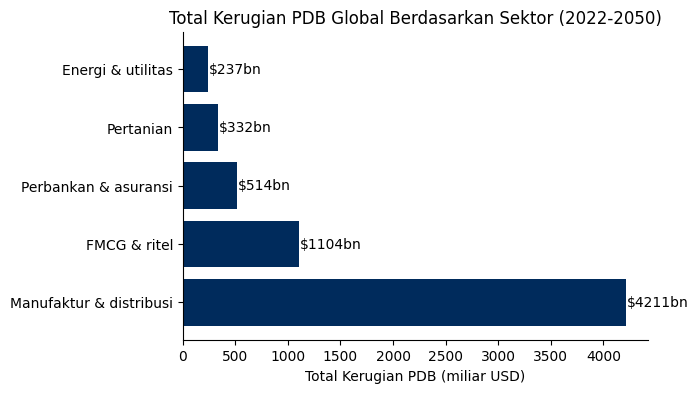

In [ ]:
data = {
    'Sektor': [
        'Manufaktur & distribusi',
        'FMCG & ritel',
        'Perbankan & asuransi',
        'Pertanian',
        'Energi & utilitas'
    ],
    'Kerugian PDB (miliar USD)': [
        4211, 1104, 514, 332, 237
    ]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.barh(df['Sektor'], df['Kerugian PDB (miliar USD)'], color='#002B5C')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 10
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'${width}bn', va='center', ha='left', color='black')

ax.set_xlabel('Total Kerugian PDB (miliar USD)')
ax.set_title('Total Kerugian PDB Global Berdasarkan Sektor (2022-2050)')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


**Prediksi Nilai Kesadahan (Hardness) Air Tanah dalam Konteks Ilmiah**

**Prediksi nilai kesadahan air tanah menjadi penting dalam konteks ilmiah** karena memiliki **dampak signifikan terhadap kesehatan manusia, pertanian, dan kelestarian lingkungan**. Sebuah artikel dari The New York Times tentang **krisis air di Mexico City** menyoroti sejumlah faktor yang menggarisbawahi urgensi ini. **Mexico City menghadapi tantangan serius dalam menyediakan air bersih** untuk penduduknya akibat **penurunan sumber air tanah dan peningkatan polusi**. Dalam kondisi ini, **memperkirakan dan mengelola kesadahan air sangat penting untuk memastikan bahwa air yang disalurkan aman untuk dikonsumsi dan tidak menyebabkan masalah kesehatan** seperti gangguan pencernaan atau kerusakan gigi akibat konsumsi mineral berlebih. Kota-kota yang menghadapi masalah dalam ketersediaan air, seperti Mexico City, juga sangat bergantung pada air tanah untuk irigasi dan pertanian. **Air dengan kesadahan tinggi dapat mengurangi produktivitas pertanian dengan mengubah karakteristik tanah dan merusak tanaman**, yang berdampak langsung pada ketersediaan pangan dan stabilitas ekonomi, terutama di wilayah yang rentan terhadap perubahan iklim. Degradasi akuifer dan penurunan kualitas air tanah adalah masalah besar yang dihadapi kota-kota seperti Mexico City. **Kesadahan air yang tinggi mencerminkan perubahan signifikan dalam komposisi kimia air tanah, yang sering kali disebabkan oleh aktivitas manusia dan perubahan iklim**. Dengan memprediksi dan mengelola kesadahan air tanah, **perubahan dalam sistem akuifer dapat lebih dipahami dan perencaan tindakan konservasi yang diperlukan** untuk melindungi sumber daya air bagi generasi yang akan datang juga semakin baik.

**Sumber**

1. Healing Waters. (n.d.). The current water crisis in Mexico. Retrieved June 29, 2024, from https://healingwaters.org/the-current-water-crisis-in-mexico/

2. Aquanomics. (n.d.). Retrieved June 29, 2024, from https://aquanomics.ghd.com/

3. New York Times. (2024, May 18). Mexico City's water crisis deepens. The New York Times. Retrieved June 29, 2024, from https://www.nytimes.com/2024/05/18/world/americas/mexico-city-water.html


#### Soal Nomor 2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!

***Overfitting*** adalah situasi di mana model berkinerja sangat baik pada data pelatihan, tetapi buruk pada data pengujian. Ini terjadi karena model terlalu menyesuaikan diri dengan data pelatihan, termasuk menangkap *noise* yang tidak penting, sehingga sulit menangani variasi pada data pengujian. Model yang *overfit* cenderung "mengingat" data pelatihan alih-alih memahami pola yang mendasarinya.

***Underfitting*** terjadi ketika model tidak mampu mempelajari pola dari data pelatihan dengan baik dan tidak dapat melakukan generalisasi pada data baru. Model yang *underfit* menunjukkan kinerja buruk pada data pelatihan dan menghasilkan prediksi yang tidak dapat diandalkan. *Underfitting* disebabkan oleh bias yang tinggi dan varians yang rendah.

Untuk memeriksa model yang digunakan mengalami ***overfitting***, ***underfitting***, atau memiliki performa yang baik (***good fit***), dilakukan perbandingan nilai R2 antara data *train* dan data validasi (*test*) sebagai berikut.


In [ ]:
# Prediksi untuk data train
gb_y_pred_train = gb_model.predict(X_train)

# Prediksi untuk data validation
gb_y_pred_val = gb_model.predict(X_val)

# Menghitung nilai r2
gb_r2_train = r2_score(y_train, gb_y_pred_train)
gb_r2_val = r2_score(y_val, gb_y_pred_val)

# Memeriksa overfit, underfit, dan good fit
print(f"Gradient Boosting Training R² score: {gb_r2_train}")
print(f"Gradient Boosting Validation R² score: {gb_r2_val}")
if gb_r2_train > gb_r2_val:
  print("Gradient Boosting model may be overfitting.")
elif gb_r2_train < 0.5:
  print("Gradient Boosting model may be underfitting.")
else:
  print("Gradient Boosting model has a good fit.")

Gradient Boosting Training R² score: 0.9525361545086888
Gradient Boosting Validation R² score: 0.9384494903298204
Gradient Boosting model may be overfitting.


Skor R² pada data pelatihan sebesar 0.952 menunjukkan bahwa model *Gradient Boosting* dapat menjelaskan sekitar 95.2% dari variabilitas dalam data pelatihan (*train*), menandakan kecocokan yang sangat baik dan kemampuannya dalam menangkap pola. Pada data validasi, skor R² sebesar 0.939 mengindikasikan bahwa model dapat menjelaskan sekitar 93.9% dari variabilitas, menunjukkan kemampuan generalisasi yang baik pada data baru (*test*). Meskipun perbedaan antara skor R² untuk data pelatihan (0.952) dan validasi (0.939) tidak signifikan, terdapat indikasi potensi ***overfitting*** pada model ini, di mana model sedikit lebih baik dalam memprediksi data pelatihan (*train*) dibandingkan memprediksi data validasi (*test*).

Sebagai bahan pertimbangan tambahan untuk menentukan apakah model mengalami *overfitting* atau *underfitting*, digunakan K-Fold Cross Validation.

***K-Fold Cross Validation*** adalah teknik yang efektif untuk mengevaluasi model machine learning dengan lebih akurat dan mengurangi risiko *overfitting*. Dalam metode ini, data dibagi menjadi beberapa bagian atau "*fold*". Setiap *fold* secara bergantian digunakan sebagai data uji (*testing set*), sementara *fold* lainnya digunakan sebagai data pelatihan (*training set*). Proses ini diulang sebanyak K kali, sehingga setiap *fold* berfungsi sebagai data uji sekali.

Dengan pembagian ini, *K-Fold Cross Validation* memastikan bahwa model dievaluasi secara menyeluruh dan tidak hanya bergantung pada subset data tertentu. Teknik ini juga membantu mengidentifikasi apakah model terlalu sederhana (*underfitting*) atau terlalu kompleks (*overfitting*), dengan memberikan gambaran performa model yang lebih stabil dan andal.

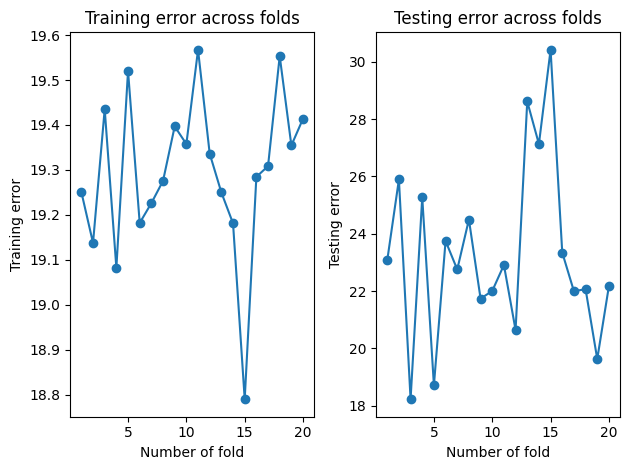

In [ ]:
# Menggunakan K-Fold Cross-Validation
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model = GradientBoostingRegressor(random_state=0)
    model.fit(X_tr, y_tr)

    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)

    fold_training_error = mean_absolute_error(y_tr, y_train_pred)
    fold_testing_error = mean_absolute_error(y_te, y_test_pred)

    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

# Plotting
plt.subplot(1, 2, 1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('Number of fold')
plt.ylabel('Training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('Number of fold')
plt.ylabel('Testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan hasil dari *K-Fold Cross Validation* pada dua metrik: *training error* dan *testing error* yang diukur dalam berbagai jumlah *fold* (dari 1 hingga 20 *fold*).

Dapat dilihat bahwa *training error* lebih stabil dan konsisten dibandingkan dengan *testing error*, yang menunjukkan variasi lebih besar di seluruh *fold*. Hal ini mengindikasikan bahwa model memiliki performa yang cukup baik pada data pelatihan tetapi mungkin tidak sepenuhnya generalisasi dengan baik pada data pengujian. Karena *testing error* jauh lebih tinggi daripada *training error* secara konsisten, ini menunjukkan bahwa model mengalami ***overfitting***, di mana model belajar terlalu spesifik pada data pelatihan dan kurang generalisasi pada data baru.

##### Cara Mengatasi *Overfitting* pada Model Machine Learning
1. ***Early Stopping***

  *Early stopping* adalah teknik yang menghentikan pelatihan model sebelum terlalu lama, untuk menghindari *overfitting*. Ini dilakukan dengan memantau performa model pada data validasi dan menghentikan pelatihan ketika performa mulai menurun, sehingga pelatihan hanya berjalan sampai saat akurasi validasi mencapai nilai terbaik.

2. ***Network Reduction (Pruning)***
  
  Network reduction* atau *pruning* adalah teknik untuk mengurangi ukuran model dengan menghapus neuron atau koneksi yang tidak penting. Ini mengurangi kompleksitas model dan mencegah overfitting. *Pruning* dilakukan dengan 2 langkah, yaitu
    - **Pre-pruning:** Menghentikan penambahan fitur berdasarkan kriteria tertentu selama pelatihan.
    - **Post-pruning:** Menghapus fitur yang tidak penting setelah pelatihan selesai.

3. **Ekspansi Data Latihan**
  
  Ekspansi data latihan adalah teknik untuk menambah jumlah dan variasi data latihan, sehingga model dapat belajar lebih baik dan mengurangi *overfitting*. Ekspansi data latihan dilakukan dengan menambahkan data yang lebih relevan serta menambahkan variasi acak pada data yang ada.

4. **Regularisasi**
  
  Regularisasi adalah teknik untuk membatasi nilai bobot dalam model agar tidak terlalu besar, yang membantu mencegah overfitting. Terdapat dua jenis utama:
  
  - **L1 *Regularization (Lasso Regression)*:** Menggunakan jumlah absolut bobot sebagai penalti, yang dapat membuat beberapa bobot menjadi nol.
  - **L2 *Regularization (Ridge Regression)*:** Menggunakan jumlah kuadrat bobot sebagai penalti, yang mengurangi nilai bobot tetapi mempertahankan semua fitur.

5. ***Dropout***

  *Dropout* adalah teknik di mana neuron dan koneksi terkaitnya secara acak dihapus selama pelatihan, untuk mencegah neuron saling beradaptasi secara berlebihan. *Droupout* dilakukan dengan menghapus setengah dari neuron tersembunyi secara acak, melatih jaringan yang telah dipangkas menggunakan *stochastic gradient descent*, kemudian mengembalikan neuron yang dihapus dan ulangi proses.

Sumber :
- Ying, X. (2018). An Overview of Overfitting and its Solutions. Journal of Physics. https://doi.org/10.1088/1742-6596/1168/2/022022

#### Soal Nomor 3. Jawablah pertanyaan-pertanyaan statistik berikut: a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata? b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!


##### **a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?**

###### **Menghitung Kadar Sodium di atas Persentil 75**

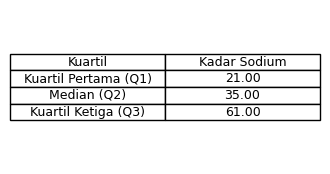

In [ ]:
# Membaca data dari file CSV
data = pd.read_csv('merge_test_results.csv')

# Menghitung kuartil
sodium_quartiles = {
    'Kuartil': ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)'],
    'Nilai': [
        np.percentile(data['Sodium'], 25),
        np.percentile(data['Sodium'], 50),  # atau data['Sodium'].median()
        np.percentile(data['Sodium'], 75)
    ]
}

# Menghitung nilai kuartil dan rata-rata
q1 = np.percentile(data['Sodium'], 25)
median = np.percentile(data['Sodium'], 50)
q3 = np.percentile(data['Sodium'], 75)

# Membuat tabel dalam bentuk gambar
fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('tight')
ax.axis('off')

# Data untuk tabel
table_data = [
    ['Kuartil Pertama (Q1)', f'{q1:.2f}'],
    ['Median (Q2)', f'{median:.2f}'],
    ['Kuartil Ketiga (Q3)', f'{q3:.2f}'],
]

# Pembuatan tabel
ax.table(cellText=table_data, colLabels=['Kuartil', 'Kadar Sodium'], cellLoc='center', loc='center')

plt.show()


Kuartil ketiga (persentil ke-75) untuk kadar Sodium adalah **61.0** . Sehingga didapatkan bahwa **25% dari sumber air memiliki kadar Sodium di atas 61.0**.

###### **Menghitung Rata-Rata Tingkat Kebasaan (Alkalinity)**

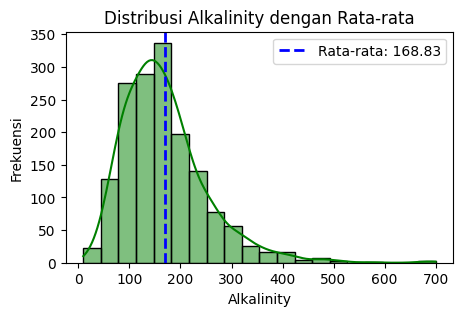

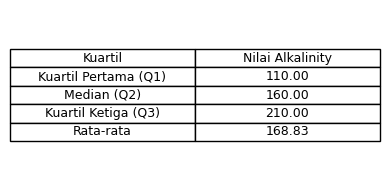

In [ ]:
# Membaca data
data = pd.read_csv('merge_test_results.csv')

# Menghitung nilai kuartil dan rata-rata
q1 = np.percentile(data['Alkalinity, total'], 25)
median = np.percentile(data['Alkalinity, total'], 50)
q3 = np.percentile(data['Alkalinity, total'], 75)
mean_alkalinity = data['Alkalinity, total'].mean()

# Membuat histogram dengan garis rata-rata
plt.figure(figsize=(5, 3))

# Membuat histogram distribusi Alkalinity
sns.histplot(data['Alkalinity, total'], bins=20, kde=True, color='green', edgecolor='black')

# Menambahkan garis rata-rata
plt.axvline(x=mean_alkalinity, color='blue', linestyle='--', linewidth=2, label=f'Rata-rata: {mean_alkalinity:.2f}')

# Menambahkan judul dan label
plt.title('Distribusi Alkalinity dengan Rata-rata')
plt.xlabel('Alkalinity')
plt.ylabel('Frekuensi')
plt.legend()

# Data untuk tabel
table_data = [
    ['Kuartil Pertama (Q1)', f'{q1:.2f}'],
    ['Median (Q2)', f'{median:.2f}'],
    ['Kuartil Ketiga (Q3)', f'{q3:.2f}'],
    ['Rata-rata', f'{mean_alkalinity:.2f}']
]

fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table_data, colLabels=['Kuartil', 'Nilai Alkalinity'], cellLoc='center', loc='center')

plt.tight_layout()
plt.show()


**Nilai rata-rata dari tingkat kebasaan (alkalinity) di seluruh sampel air dalam dataset adalah 168.83**. Dari grafik, dapat dilihat bahwa **distribusi data agak miring ke kanan (positively skewed)**. Hal ini berarti ada **lebih banyak sampel dengan nilai Alkalinity yang lebih rendah dibandingkan dengan nilai yang lebih tinggi**, tetapi ada **beberapa outlier atau nilai ekstrem yang cukup tinggi di sebelah kanan rata-rata**.

###### **Menghitung Rata-Rata Hardness dari Kadar Sodium di atas Persentil 75 dan Rata-Rata Tingkat Kebasaan (Alkalinity)**

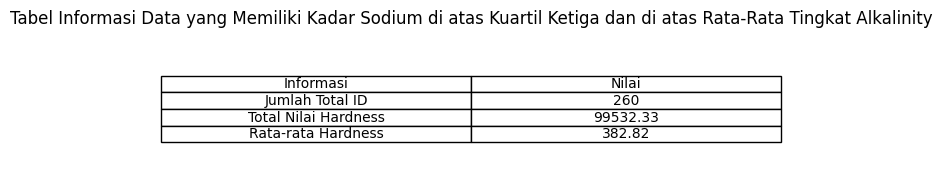

In [ ]:
# Membaca data
data = pd.read_csv('merge_test_results.csv')

# Menghitung kuartil ketiga dan rata-rata
q3 = np.percentile(data['Sodium'], 75)
mean_alkalinity = data['Alkalinity, total'].mean()

# Memfilter data
filtered_data = data[(data['Sodium'] > q3) & (data['Alkalinity, total'] > mean_alkalinity)]

# Menghitung jumlah total ID, total nilai Hardness, dan rata-rata Hardness
total_id = len(filtered_data)
total_hardness = filtered_data['Hardness'].sum()
average_hardness = filtered_data['Hardness'].mean()

# Data untuk tabel
table_data = [
    ['Jumlah Total ID', f'{total_id}'],
    ['Total Nilai Hardness', f'{total_hardness:.2f}'],
    ['Rata-rata Hardness', f'{average_hardness:.2f}']
]

# Buat tabel menggunakan matplotlib
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table_data, colLabels=['Informasi', 'Nilai'], cellLoc='center', loc='center')

plt.title('Tabel Informasi Data yang Memiliki Kadar Sodium di atas Kuartil Ketiga dan di atas Rata-Rata Tingkat Alkalinity', fontsize=12)
plt.show()

Setelah memfilter data berdasarkan kriteria Sodium yang lebih tinggi dari kuartil ketiga (Q3) dan Alkalinity yang lebih tinggi dari rata-rata, terdapat **260 sampel** yang memenuhi syarat tersebut. Total nilai Hardness dari data yang telah difilter adalah **99532.33**. Sehingga didapatkan bahwa **rata-rata hardness dari sampel yang telah difilter adalah 382.82**.

##### **b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!**

###### **Mengidentifikasi Data yang Merupakan Outlier**

Jumlah total ID yang merupakan outlier: 44


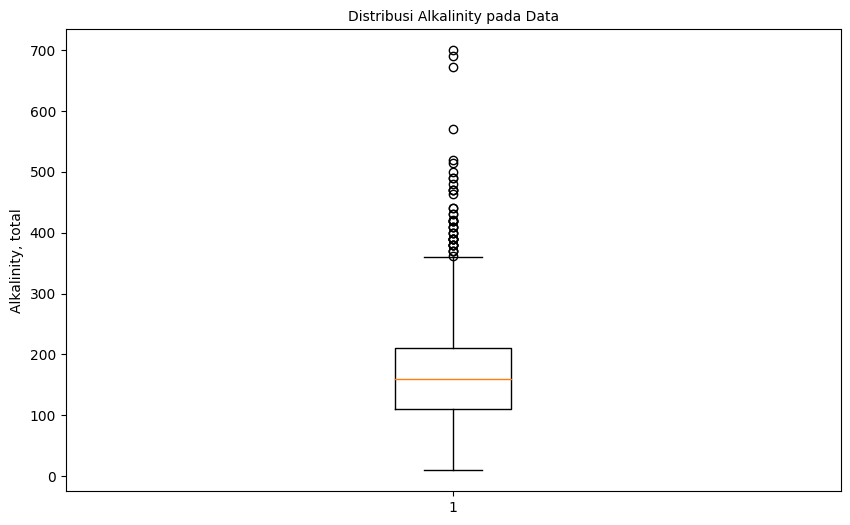

In [ ]:
# Membaca data
data = pd.read_csv('merge_test_results.csv')

# Menghitung IQR (Jangkauan Interkuartil)
q1 = data['Alkalinity, total'].quantile(0.25)
q3 = data['Alkalinity, total'].quantile(0.75)
IQR = q3 - q1

# Batas bawah dan atas untuk menentukan outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Mengidentifikasi data yang merupakan outlier
outliers = data[(data['Alkalinity, total'] < lower_bound) | (data['Alkalinity, total'] > upper_bound)]

# Mendapatkan jumlah total ID yang merupakan outlier
total_outliers = outliers.shape[0]
print(f'Jumlah total ID yang merupakan outlier: {total_outliers}')

# Visualisasi dengan boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data['Alkalinity, total'])
plt.title('Distribusi Alkalinity pada Data', fontsize=10)
plt.ylabel('Alkalinity, total')

# Menampilkan plot
plt.show()

Dari hasil analisis yang dilakukan, dapat disimpulkan bahwa **jumlah sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dianggap sebagai outlier sebanyak 44**. **Hasil visualisasi** yang diberikan juga dapat **membuktikan** hal tersebut dengan beberapa titik yang berada jauh di atas *box plot* **bold text**. Hal ini bisa disebabkan oleh berbagai faktor, seperti kondisi lingkungan yang berbeda, kontaminasi, atau kesalahan dalam pengukuran data.

#### Soal Nomor 4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!


Korelasi antara Specific Conductivity dan Hardness:
                       Specific Conductivity  Hardness
Specific Conductivity               1.000000  0.595007
Hardness                            0.595007  1.000000


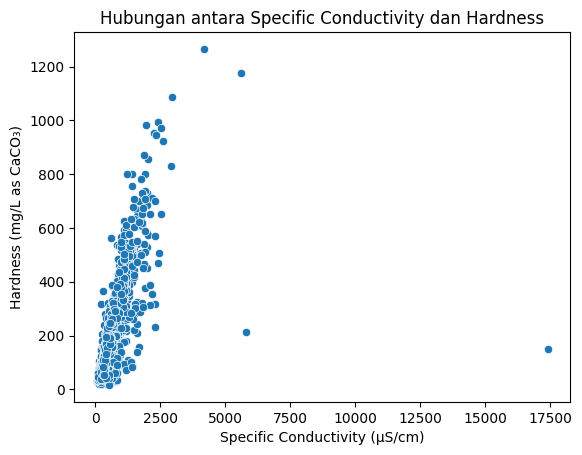

In [ ]:
# Membaca data
data = pd.read_csv('merge_test_results.csv')

# Menghitung korelasi
correlation = data[['Specific Conductivity', 'Hardness']].corr()
print("Korelasi antara Specific Conductivity dan Hardness:")
print(correlation)

# Visualisasi hubungan dengan scatter plot
sns.scatterplot(x='Specific Conductivity', y='Hardness', data=data)
plt.title('Hubungan antara Specific Conductivity dan Hardness')
plt.xlabel('Specific Conductivity (µS/cm)')
plt.ylabel('Hardness (mg/L as CaCO₃)')
plt.show()


Dari tabel didapatkan bahwa **korelasi antara Specific Conductivity dan Hardness adalah sebesar 0.595007**.
Korelasi ini menunjukan **hubungan positif** antara **Spesific Conductivity dan Hardness sehingga saat sumber air memiliki konduktivitas spesifik yang lebih tinggi maka hardnessnya pun cenderung bernilai lebih tinggi**. Hal ini mungkin disebabkan oleh meningkatnya jumlah ion terlarut yang berkontribusi terhadap kedua variabel ini.

Dari gambar scatter plot yang menggambarkan hubungan antara Specific Conductivity dan Hardness, dapat disimpulkan bahwa **sebagian besar nilai Hardness berada di bawah 800 mg/L, dengan konsentrasi data yang tinggi di bawah 400 mg/L**. Dapat dilihat juga **beberapa outlier yang memiliki nilai Specific Conductivity yang sangat tinggi tetapi Hardness yang relatif rendah**. Meskipun terdapat beberapa outlier, **scatter plot secara umum menunjukkan adanya pola kenaikan**. Sebagian besar data menunjukkan bahwa saat **Specific Conductivity meningkat, Hardness juga cenderung meningkat, meskipun tidak secara linier sempurna**. Informasi ini dapat berguna dalam pengelolaan kualitas air, di mana pemantauan Specific Conductivity dapat membantu memperkirakan tingkat Hardness.

#### Soal Nomor 5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi *Hardness*? Jelaskan!

Untuk menentukan hubungan antara zat kimia dengan *Hardness*, dapat digunakan analisis korelasi dengan memanfaatkan *heatmap*.

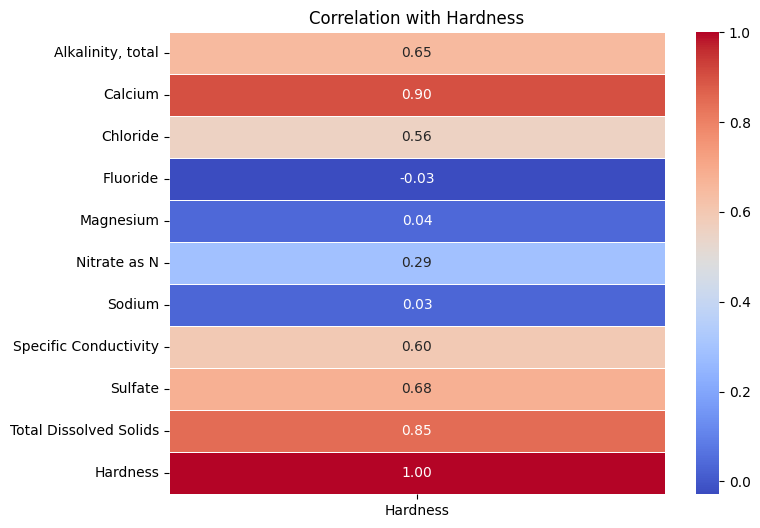

In [ ]:
# Menggabungkan data hardness dengan test
test_df = pd.read_csv('test.csv')
predicted_data = pd.read_csv('results.csv')
merged_data = test_df.merge(predicted_data, on='id')

# Membuat correlation matrix untuk hardness dengan kolom lainnya
correlation_test = merged_data.drop(columns=['id']).corr()
hardness_correlation = correlation_test[['Hardness']]

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(hardness_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation with Hardness')
plt.show()


##### Pengaruh Zat Kimia terhadap Tingkat Kesadahan Air (Hardness)

Berdasarkan matriks korelasi, beberapa zat kimia yang paling mempengaruhi tingkat kesadahan air adalah sebagai berikut:

1. **Calcium (0.90)**
   
   Kalsium memiliki korelasi sangat tinggi dengan kesadahan air (0.90). Hal ini disebabkan karena kalsium merupakan komponen utama yang menyebabkan kesadahan air. Kalsium dalam air dapat bersenyawa dengan bikarbonat, sulfat, klorida, dan nitrat, meningkatkan jumlah ion terlarut yang berkontribusi pada kesadahan air. Tingkat kesadahan air pun umum disebut sebagai tingkat kesadahan CaCO3 (kalsium karbonat), yang dihitung sebagai indikator keberadaan kalsium dalam air.

2. **Total Dissolved Solids (TDS) (0.85)**
   
   *Total dissolved solids* memiliki korelasi positif tinggi dengan kesadahan air (0.85). Hal ini menunjukkan bahwa jumlah padatan terlarut adalah salah satu komponen yang paling berpengaruh dalam penentuan kesadahan air. Nilainya yang positif menunjukkan bahwa jika jumlah padatan terlarut dalam air meningkat, maka tingkat kesadahan air juga akan meningkat. Padatan terlarut ini termasuk kalsium dan magnesium, serta ion-ion lain seperti besi dan mangan yang berkontribusi pada kesadahan air.

3. **Sulfate (0.68)**
   
   Sulfat juga memiliki korelasi positif dengan kesadahan air (0.68). Sulfat dapat berinteraksi dengan kalsium dan magnesium untuk membentuk senyawa terlarut yang menambah kesadahan. Misalnya, kalsium sulfat (CaSO₄) dan magnesium sulfat (MgSO₄) adalah senyawa yang berkontribusi terhadap kesadahan air. Kehadiran sulfat dalam air dapat meningkatkan jumlah ion yang berkontribusi pada kesadahan.

##### Zat Kimia yang Paling Tidak Mempengaruhi Kesadahan Air

1. **Fluoride (-0.03)**
   
   Fluorida memiliki korelasi yang sangat rendah dan negatif dengan kesadahan air (-0.03), menunjukkan bahwa kehadiran fluorida hampir tidak mempengaruhi kesadahan air. Fluorida tidak membentuk senyawa dengan kalsium atau magnesium yang akan meningkatkan kesadahan air. Oleh karena itu, walaupun fluorida mungkin hadir dalam air, itu tidak berkontribusi secara signifikan terhadap kesadahan.

2. **Sodium (0.03)**
   
   Sodium juga memiliki pengaruh yang sangat rendah terhadap kesadahan air. Sodium adalah ion monovalen, bukan divalen seperti kalsium dan magnesium. Kesadahan air terutama disebabkan oleh ion-ion divalen yang membentuk senyawa dengan bikarbonat, sulfat, dan klorida. Oleh karena itu, kehadiran sodium dalam air tidak mempengaruhi kesadahan secara signifikan.

3. **Magnesium (0.04)**
   
   Walaupun magnesium adalah salah satu komponen utama penyebab kesadahan air, korelasinya mungkin rendah dalam data yang diberikan. Hal ini bisa disebabkan oleh variasi dalam konsentrasi magnesium dibandingkan dengan kalsium. Dalam beberapa kasus, kalsium mungkin lebih dominan dalam air, sehingga peran magnesium menjadi relatif kurang signifikan.

**Sumber** :
- Sengupta, P. (2012). Potential Health Impacts of Hard Water. International Journal of Preventive Medicine. Retrieved June 29, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3775162/


#### Soal Nomor 6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?

Korelasi yang tinggi antara dua zat kimia dapat mengindikasikan bahwa kedua zat tersebut mungkin berinteraksi atau dipengaruhi oleh faktor yang sama. Korelasi tinggi juga dapat menunjukkan hubungan sebab akibat serta sebagai bahan evaluasi efek dari satu zat terhadap zat lainnya. Untuk menentukan hubungan antara zat kimia, dapat digunakan analisis korelasi dengan memanfaatkan heatmap.


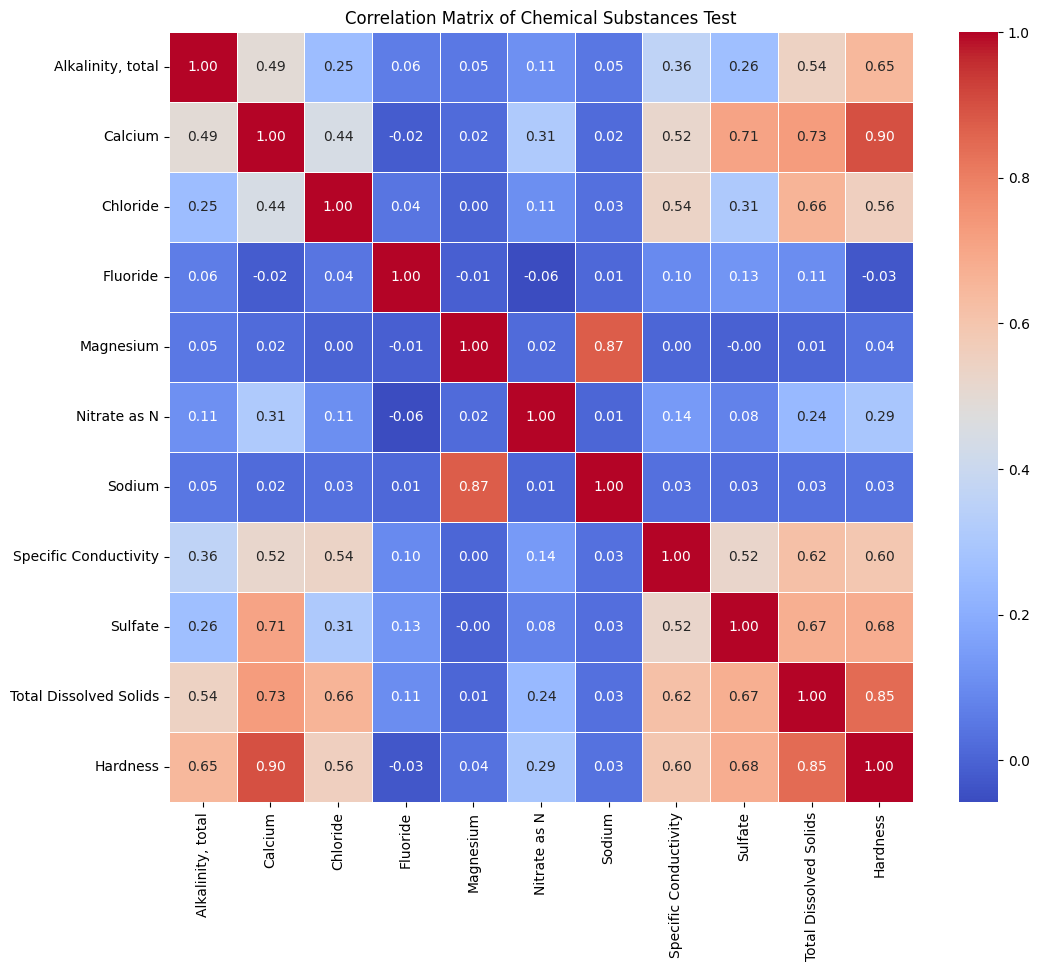

In [ ]:
# Menggabungkan data hardness dengan test
test_df = pd.read_csv('test.csv')
predicted_data = pd.read_csv('results.csv')
merged_data = test_df.merge(predicted_data, on='id')

# Membuat matriks korelasi
correlation_test = merged_data.drop(columns=['id']).corr()

# Menggambarkan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_test, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Chemical Substances Test')
plt.show()

Beberapa zat kimia yang memiliki korelasi tinggi adalah sebagai berikut:
1. **Calcium dengan Hardness**

   Kalsium dan kesadahan memiliki nilai korelasi positif dan tinggi (0,91), hal ini menunjukkan bahwa kalsium dapat dijadikan komponen penting dalam penentuan kesadahan air. Nilainya yang positif juga menunjukkan bahwa apabila kadar kalsium pada air meningkat, maka tingkat kesadahan air juga meningkat.
2. **Magnesium dengan Sodium**
   
   Magnesium dan sodium memiliki nilai korelasi positif dan tinggi (0,87). Nilainya yang positif juga menunjukkan bahwa apabila kadar magnesium pada air tinggi, maka kadar sodium pada air juga tinggi.
3. **Total Dissolved Solids dengan Hardness**

   Jumlah padatan terlarut pada air dan kesadahan memiliki nilai korelasi positif dan tinggi (0,84), hal ini menunjukkan bahwa Jumlah padatan terlarut dapat dijadikan komponen penting dalam penentuan kesadahan air. Nilainya yang positif juga menunjukkan bahwa apabila jumlah padatan terlarut pada air meningkat, maka tingkat kesadahan air juga meningkat.

4. **Calcium dengan Total Dissolved Solids**
   
   Kalsium dan jumlah padatan terlarut memiliki nilai korelasi positif dan tinggi (0,73). Nilainya yang positif juga menunjukkan bahwa apabila kadar kalsium pada air tinggi, maka jumlah padatan terlarut juga tinggi.
5. **Calcium dengan Sulfate**
   
   Kalsium dan sulfat memiliki nilai korelasi positif dan tinggi (0,71). Nilainya yang positif juga menunjukkan bahwa apabila kadar kalsium pada air tinggi, maka kadar sulfat pada air juga tinggi.


#### Soal 7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering.

Dalam membantu kemampuan model dalam memprediksi, kami mencoba berbagai cara. Cara-cara tersebut adalah sebagai berikut:

1. *Interaction Terms*

   Fitur-fitur baru yang dibuat dari kombinasi dua atau lebih fitur asli. Dua atau lebih variabel dapat berinteraksi satu sama lain untuk memengaruhi variabel target dengan cara yang tidak dapat diungkapkan oleh variabel-variabel tersebut secara individu. Menggunakan matriks korelasi, kita memilih 3 fitur yang memiliki nilai korelasi tertinggi untuk menjadi interaction term.
2. *Scaling*

   Menstandarisasi fitur dengan mengubahnya sehingga memiliki mean 0 dan standard deviation 1. Model berbasis gradien biasanya berkinerja lebih baik ketika fitur memiliki distribusi yang seragam.
3. *Polynomial Features*

   Meningkatkan kemampuan model machine learning dengan menambahkan fitur baru yang merupakan kombinasi polinomial dari fitur-fitur asli.

Dalam model ini, kami hanya mengimplementasikan Interaction Terms karena kami telah mencoba penggunaan feature engineering lainnya, namun model mengalami kenaikan nilai MAE dan penurunan nilai R2.

#### Soal 8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?

Dalam memprediksi nilai hardness, kami menggunakan model Gradient Boosting Regressor yang menghasilkan model prediksi dari kumpulan decision tree sebelum digeneralisasi. Metode ini bekerja dengan cara menggabungkan serangkaian pohon keputusan (decision trees) yang relatif sederhana secara berurutan, di mana setiap pohon berusaha untuk memperbaiki kesalahan prediksi yang dibuat oleh pohon sebelumnya. Beberapa komponen utama pada model ini adalah:
1. Pohon Keputusan (Decision Trees): Metode ini menggabungkan pohon keputusan yang relatif dangkal (shallow decision trees atau weak predictors).
2. Pendekatan Gradient Descent: Proses pembelajaran berlangsung dengan mengoptimalkan fungsi tujuan, yang sering kali menggunakan mean squared error (MSE) atau mean absolute error (MAE). Gradient boosting berfokus pada mengurangi gradien dari fungsi tujuan ini secara bertahap.
3. Boosting: Teknik ensemble di mana model dibangun secara bertahap. Setiap pohon berikutnya akan memperbaiki kesalahan prediksi yang dilakukan oleh kombinasi model sebelumnya.

Optimal bermakna memiliki nilai R2 terbesar ketika diuji dengan data latihan yang menandakan kemiripan terhadap nilai aktual. Kami menggunakan model ini berdasarkan beberapa pertimbangan:
1. Gradient Boosting Regressor akan terus membangun model untuk mengoreksi pembentukan model sebelumnya. Hal ini akan meningkatkan akurasi dan menghasilkan generalisasi yang baik.
2. Gradient Boosting Regressor memiliki nilai R2 terbesar. Kami telah membandingkannya dengan penggunaan model linear regression, XGB, SVR, random forest, dan lainnya. Hal ini menandakan akurasi tertinggi.
3. Gradient Boosting cukup robust terhadap missing values dan outlier.

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_val)
linear_mae = mean_absolute_error(y_val, linear_y_pred)
print(f"Linear Regression MAE score: {linear_mae}")

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_val)
gb_mae = mean_absolute_error(y_val, gb_y_pred)
print(f"Gradient Boosting MAE score: {gb_mae}")

# Support Vector Regressor Model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_val)
svr_mae = mean_absolute_error(y_val, svr_y_pred)
print(f"Support Vector Regressor MAE score: {svr_mae}")

# XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_y_pred)
print(f"XGBoost Regressor MAE score: {xgb_mae}")

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_val)
rf_mae = mean_absolute_error(y_val, rf_y_pred)
print(f"Random Forest Regressor MAE score: {rf_mae}")

Linear Regression MAE score: 43.21566733959621
Gradient Boosting MAE score: 20.691101307661235
Support Vector Regressor MAE score: 85.96650338398346
XGBoost Regressor MAE score: 23.750138158944996
Random Forest Regressor MAE score: 21.413417203125


Berdasarkan nilai MAE dari berbagai model, model Gradient Boosting memiliki nilai MAE terkecil, sehingga prediksi akan dilakukan menggunakan model **Gradient Boosting Regressor**.

#### Soal 9. Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!

**Metrik R²**, atau koefisien determinasi, adalah salah satu metrik yang sering digunakan untuk mengevaluasi model regresi. R² mengukur sejauh mana varians dari variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. Nilai R² berkisar antara 0 hingga 1, di mana nilai yang mendekati 1 menunjukkan bahwa model mampu menjelaskan proporsi yang tinggi dari varians pada data.

Penggunaan penilaian R² cukup tepat dengan mempertimbangkan beberapa hal berikut:
- Kemudahan Interpretasi: R² sangat intuitif dan mudah diinterpretasikan. Nilai R² menjelaskan proporsi varians pada variabel dependen yang dapat dijelaskan oleh variabel independen. Sebagai contoh, R² = 0.90 berarti 90% dari varians dalam data dapat dijelaskan oleh model. Ini membuat R² menjadi metrik yang menarik, terutama dalam komunikasi hasil kepada audiens yang mungkin tidak memiliki keahlian teknis yang mendalam.
- Penilaian Kesesuaian Model: R² memberikan indikasi cepat mengenai seberapa baik model sesuai dengan data yang diamati. Nilai yang tinggi menunjukkan bahwa model memiliki tingkat kesesuaian yang baik, sedangkan nilai yang rendah dapat menjadi indikator bahwa model mungkin memerlukan penyesuaian atau pengembangan lebih lanjut.

Namun, metrik R² memiliki beberapa keterbatasan yang membuatnya tidak selalu menjadi metrik yang paling tepat:
- Nilai R² yang tinggi atau rendah belum tentu baik atau buruk karena hal ini tidak menunjukkan keandalan model atau apakah Anda telah memilih regresi yang tepat. Anda bisa mendapatkan R-kuadrat yang rendah untuk model yang bagus, atau R-kuadrat yang tinggi untuk model yang pemasangannya buruk, dan sebaliknya.
- Skalabilitas: R² tidak mempertimbangkan skala variabel respons, sehingga sulit untuk membandingkan kualitas model antar dataset yang berbeda.
- Penambahan Variabel: R² selalu meningkat atau tetap sama ketika variabel baru ditambahkan ke model, terlepas dari apakah variabel tersebut benar-benar relevan dengan model. Hal ini bisa menyebabkan model overfit.
- Sensitivitas terhadap Outlier: R² bisa sangat sensitif terhadap outlier. Outlier dapat secara signifikan mempengaruhi nilai R², membuatnya kurang dapat diandalkan dalam kehadiran nilai ekstrem.

Dengan mempertimbangkan alasan-alasan di atas, maka kami lebih memilih untuk menggunakan metrik **MAE (Mean Absolute Error)** dalam model ini. Metrik ini mengukur rata-rata kesalahan absolut dalam prediksi, memberikan ide tentang berapa rata-rata kesalahan yang diharapkan dalam prediksi tanpa mempertimbangkan arah kesalahan (positif atau negatif). MAE lebih tahan terhadap outlier dibandingkan MSE. Selain penggunaan MAE, terdapat beberapa metrik lainnya yang dapat menjadi pertimbangan:

1. Adjusted R²

   Adjusted R² mengatasi masalah penambahan variabel yang tidak relevan dengan mengenakan penalitas terhadap jumlah variabel dalam model. Metrik ini lebih tepat digunakan ketika terdapat banyak variabel prediktor, dan membantu mencegah overfitting.

2. Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE)

   MSE mengukur rata-rata dari kuadrat kesalahan, yaitu, perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya. RMSE adalah akar kuadrat dari MSE dan memberikan estimasi kesalahan model dalam unit yang sama dengan variabel respons. Kedua metrik ini sangat berguna karena mereka memberikan informasi tentang besarnya kesalahan yang dihasilkan oleh model.

3. Mean Absolute Percentage Error (MAPE)

   MAPE mengukur kesalahan sebagai persentase dan sangat berguna untuk kasus di mana kita ingin mengetahui kesalahan relatif dalam konteks persentase. Ini berguna terutama dalam konteks bisnis atau prediksi ekonomi.

4. R-squared (Q²) dalam Validasi Silang

   Untuk lebih robust terhadap data baru, R² bisa dihitung dalam konteks validasi silang, di mana data dibagi menjadi subset untuk pelatihan dan pengujian. Hal ini membantu memastikan bahwa nilai R² yang dilaporkan merupakan refleksi dari kemampuan model untuk generalisasi, bukan hanya performa pada data pelatihan.

#### Soal 10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness!


##### Pengaruh Faktor Eksternal terhadap Nilai Kekerasan Air (Hardness)

Jika diperbolehkan untuk mengumpulkan data dari berbagai sumber eksternal guna memprediksi nilai kekerasan air dengan lebih akurat, berikut merupakan beberapa data yang akan kami ambil serta penjelasannya:

1. **Logam dengan Valensi 2**
   - Menurut D. Fitriana (2018) dalam Penentuan Kesadahan Air dengan Titrasi Kompleksometri, air sadah adalah air yang mengandung kation penyebab kesadahan, terutama logam-logam bervalensi 2 seperti Fe, Sr, Mn, Ca, dan Mg. Logam utama yang menyebabkan kesadahan adalah kalsium (Ca) dan magnesium (Mg).
   - Pallav Sengupta dalam *Potential Health Impacts of Hard Water* juga menambahkan bahwa kesadahan air biasanya disebabkan oleh konsentrasi tinggi ion kalsium dan magnesium. Namun, logam lain yang membentuk kation divalen atau multivalen seperti aluminium, barium, strontium, besi, seng, dan mangan juga dapat menyebabkan kesadahan.
   - Dapat disimpulkan, meskipun bukan merupakan logam utama yang menyebabkan kesadahan, logam bervalensi dua seperti besi dan mangan juga dapat berinteraksi dengan kalsium dan magnesium, mempengaruhi distribusi ion dalam air, dan akhirnya mempengaruhi kekerasan air.

2. **pH**
   - pH air mempengaruhi kemampuan air untuk mengikat mineral seperti kalsium dan magnesium yang berkontribusi pada kekerasan air. Air dengan pH rendah (asam) dapat melarutkan lebih banyak mineral dari tanah dan batuan, sementara pH tinggi (basa) dapat menyebabkan presipitasi mineral.

3. **Suhu (Temperature)**
   - Menurut Bill B. Wang dan tim pada* Research on drinking water purification technologies for household use by reducing total dissolved solids (TDS)*, pemanasan air hingga sekitar 50°C dapat mengurangi *total dissolved solids* (TDS) sekitar 16%, yang membantu menurunkan kesadahan air. Suhu air juga mempengaruhi kelarutan mineral dan senyawa dalam air. Suhu yang lebih tinggi biasanya meningkatkan kelarutan mineral tertentu, yang dapat meningkatkan kekerasan air. Selain itu, suhu dapat pula mempengaruhi aktivitas biologis yang dapat mengubah komposisi kimia air.

4. **Data Geografis dan Lingkungan**
   - Data geografis seperti jenis tanah, sumber air (sungai, danau, sumur), dan kondisi lingkungan (industri di sekitar, pertanian) dapat memberikan informasi tambahan tentang potensi sumber mineral yang larut dalam air. Misalnya, tanah kapur cenderung memiliki air dengan kekerasan tinggi.

5. **Pengaruh Musim**
   - Di Meksiko, di mana sampel data diambil, terdapat dua musim, yaitu musim kering dan musim hujan. Berdasarkan penelitian *Hydrogeochemical Characteristics and Assessment of Drinking Water Quality in the Urban Area of Zamora, Mexico* oleh Claudia Alejandra Reyes-Toscano dan timnya, setiap musim memiliki pengaruh masing-masing terhadap tingkat kekerasan air.
     - **Musim Kering (Dry Season)**:
       - Selama musim kering, aliran air biasanya berkurang, yang mengakibatkan peningkatan konsentrasi mineral dalam sumber air karena kurangnya pengenceran. Air yang mengalami evaporasi dapat meninggalkan mineral terlarut, meningkatkan kekerasan air. Selain itu, volume air yang berkurang di sungai dan waduk selama musim kering dapat meningkatkan konsentrasi zat terlarut, termasuk ion-ion yang menyebabkan kekerasan air seperti kalsium dan magnesium.
     - **Musim Hujan (Rainy Season)**:
       - Curah hujan yang tinggi selama musim hujan dapat mengencerkan konsentrasi mineral dalam sumber air. Hujan deras meningkatkan volume air, yang dapat mengurangi kekerasan dengan mengencerkan konsentrasi ion penyebab kekerasan.

Dengan memahami hubungan dan korelasi data-data tersebut dengan kekerasan air, penambahan data ini akan membantu model dalam memberikan prediksi nilai kekerasan air yang lebih baik dan lebih akurat.

**Sumber** :    
- Cholil, M. (2015). ANALISIS KESADAHAN AIR TANAH DI KECAMATAN TOROH KABUPATEN GROBOGAN PROPINSI JAWA TENGAH. Retrieved June 29, 2024, from https://publikasiilmiah.ums.ac.id/bitstream/handle/11617/6704/10.%20Munawar%20Cholil%2C%20Alif%20Noor%20Anna%2C%20Nining%20Setyaningsih.pdf?sequence=1&isAllowed=y
- Fetriana, D. (2017). PERBEDAAN ASAL MEDIA PENUKAR ION UNTUK MENURUNKAN KESADAHAN AIR SUMUR GALI [Thesis]. http://eprints.poltekkesjogja.ac.id/1084/
- Wang, B. B. (2020). Research on drinking water purification technologies for household use by reducing total dissolved solids (TDS). PLOS ONE. https://doi.org/10.1371%2Fjournal.pone.0257865